<a href="https://colab.research.google.com/github/SharmaAshwini/UNT/blob/main/Machine%20Learning/Assignment_2_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Student name: Ashwini Kumar Sharma
## Assignment: Regression [Logistic]

### Part 1: Data Wrangling (50 pts)
You have to write code to answer the questions below
7 pts each subtask except for the first one (importing pandas...) which is worth 1 pt

In [ ]:
import pandas as pd

"""
Import pandas library
Read the data stored in your local machine https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset
Save data to a variable named df
"""

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
!gdown '1zweAahm7OUCQ2y8pgwc5FrGqW9oV6Tbx'

Downloading...
From: https://drive.google.com/uc?id=1zweAahm7OUCQ2y8pgwc5FrGqW9oV6Tbx
To: /content/healthcare-dataset-stroke-data.csv
100% 317k/317k [00:00<00:00, 112MB/s]


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


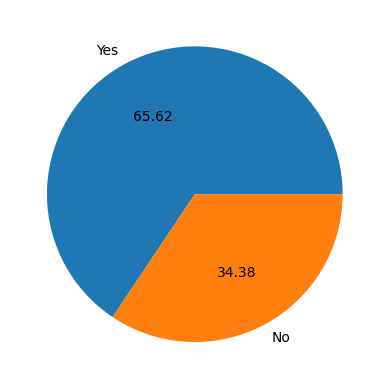

In [ ]:
'''
Use a pie chart to show the percentage of ever_married with labels and percentage rounded up to 2 decimals.
'''

<Axes: ylabel='ever_married'>

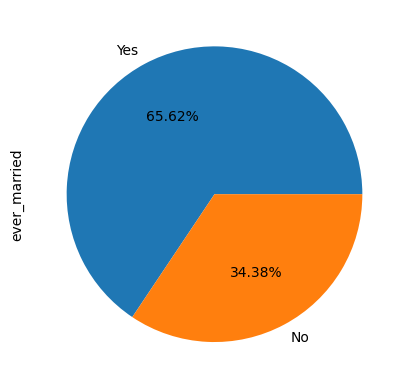

In [ ]:
df['ever_married'].value_counts().plot.pie(autopct='%.2f%%')

In [ ]:
'''
Encode the categorical columns to numeric. There are two types of encoding: ordinal and one-hot. Explain why you choose the encoding technique to the column(s) and implement it. Show some rows of df after encoding. There will be no printed console in this subtask
Reference (you may need incognito mode to browse the pages):
    https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html
    https://towardsdatascience.com/guide-to-encoding-categorical-features-using-scikit-learn-for-machine-learning-5048997a5c79
    https://stackoverflow.com/questions/56502864/using-ordinalencoder-to-transform-categorical-values
    https://stackoverflow.com/questions/37292872/how-can-i-one-hot-encode-in-python
    https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html
'''

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
one_hot = pd.get_dummies(df, prefix=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

In [ ]:
one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5110 non-null   int64  
 1   age                             5110 non-null   float64
 2   hypertension                    5110 non-null   int64  
 3   heart_disease                   5110 non-null   int64  
 4   avg_glucose_level               5110 non-null   float64
 5   bmi                             4909 non-null   float64
 6   stroke                          5110 non-null   int64  
 7   gender_Female                   5110 non-null   uint8  
 8   gender_Male                     5110 non-null   uint8  
 9   gender_Other                    5110 non-null   uint8  
 10  ever_married_No                 5110 non-null   uint8  
 11  ever_married_Yes                5110 non-null   uint8  
 12  work_type_Govt_job              51

**Why One-hot encoding:**

The reason I chose one-hot encoding over ordinal is the nature of data present in this dataset. Categorical columns are gender, ever_married, work_type, Residence_type, smoking_status, which don't have any order or ranking associated. For e.g., there is no order associated in gender for female over male or viceversa. Hence, data type is Nominal for categorical columns and not Ordinal.


One-hot is suitable for Nominal category data, and panda's get_dummies implements it in a single line, efficiently.


In [ ]:
#printing some rows of df after encoding
one_hot

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
1,51676,61.0,0,0,202.21,NaN,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
2,31112,80.0,0,1,105.92,32.5,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.4,1,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,1665,79.0,1,0,174.12,24.0,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,NaN,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
5106,44873,81.0,0,0,125.20,40.0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
5107,19723,35.0,0,0,82.99,30.6,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
5108,37544,51.0,0,0,166.29,25.6,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0


In [ ]:
# Return boolean values indicating the number of missing rows of each column in ascending order. Do not overwrite df.

id                                0.000000
smoking_status_formerly smoked    0.000000
Residence_type_Urban              0.000000
work_type_children                0.000000
work_type_Self-employed           0.000000
work_type_Private                 0.000000
work_type_Never_worked            0.000000
ever_married_Yes                  0.000000
gender_Other                      0.000000
gender_Male                       0.000000
stroke                            0.000000
avg_glucose_level                 0.000000
heart_disease                     0.000000
hypertension                      0.000000
age                               0.000000
smoking_status_never smoked       0.000000
smoking_status_smokes             0.000000
bmi                               3.933464
dtype: float64

In [ ]:
one_hot.isnull().sum().sort_values(ascending=1)

id                                  0
smoking_status_formerly smoked      0
smoking_status_Unknown              0
Residence_type_Urban                0
Residence_type_Rural                0
work_type_children                  0
work_type_Self-employed             0
work_type_Private                   0
work_type_Never_worked              0
work_type_Govt_job                  0
smoking_status_never smoked         0
ever_married_Yes                    0
gender_Other                        0
gender_Male                         0
gender_Female                       0
stroke                              0
avg_glucose_level                   0
heart_disease                       0
hypertension                        0
age                                 0
ever_married_No                     0
smoking_status_smokes               0
bmi                               201
dtype: int64

In [ ]:
'''
Use one of imputation techniques in https://scikit-learn.org/stable/modules/impute.html#nearest-neighbors-imputation on bmi
Remember to keep df as of DataFrame type after applying imputation
Show the total number of missing values of the entire dataset
'''

0

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2, weights="uniform")
imputed_data = imputer.fit_transform(one_hot)  # impute all the missing data
df_temp = pd.DataFrame(imputed_data)
df_temp.columns = one_hot.columns
one_hot['bmi'] = df_temp['bmi']

In [ ]:
type(one_hot)

pandas.core.frame.DataFrame

In [ ]:
print(f'total number of missing values of the entire dataset: {one_hot.isnull().sum().sum()}')

total number of missing values of the entire dataset: 0


In [ ]:
'''Categorize bmi into groups as https://images.agoramedia.com/everydayhealth/gcms/BMI-in-Adults-722x406.jpg?width=722.
Print the column bmi after transformed. Do not overwrite to df
'''

0       extremly_obsese
1            overweight
2                obsese
3                obsese
4                normal
             ...       
5105             obsese
5106    extremly_obsese
5107             obsese
5108         overweight
5109         overweight
Name: bmi, Length: 5110, dtype: object

In [ ]:
pd.cut(one_hot.bmi,[0, 18.4, 24.9, 29.9, 34.9, np.inf],labels=[ "underweight", 'normal', 'overweight', 'obese', 'extremely_obese' ])

0       extremely_obese
1                 obese
2                 obese
3                 obese
4                normal
             ...       
5105              obese
5106    extremely_obese
5107              obese
5108         overweight
5109         overweight
Name: bmi, Length: 5110, dtype: category
Categories (5, object): ['underweight' < 'normal' < 'overweight' < 'obese' < 'extremely_obese']

In [ ]:
'''
Show the column avg_glucose_level whose values are binned into 10 equal-sized discrete intervals with labels such as "level 1", "level 2", etc.
Do not overwrite to df
'''

0       level 9
1       level 7
2       level 3
3       level 6
4       level 6
         ...   
5105    level 2
5106    level 4
5107    level 2
5108    level 6
5109    level 2
Name: avg_glucose_level, Length: 5110, dtype: category
Categories (10, object): ['level 1' < 'level 2' < 'level 3' < 'level 4' ... 'level 7' < 'level 8' < 'level 9' < 'level 10']

In [ ]:
pd.cut(one_hot.avg_glucose_level, bins=10, labels=['level 1', 'level 2', 'level 3','level 4','level 5','level 6','level 7','level 8','level 9','level 10'])

0       level 9
1       level 7
2       level 3
3       level 6
4       level 6
         ...   
5105    level 2
5106    level 4
5107    level 2
5108    level 6
5109    level 2
Name: avg_glucose_level, Length: 5110, dtype: category
Categories (10, object): ['level 1' < 'level 2' < 'level 3' < 'level 4' ... 'level 7' < 'level 8' <
                          'level 9' < 'level 10']

In [ ]:
'''
Show the column avg_glucose_level whose values are binned into 5 equal percentile intervals as the output.
Do not overwrite to df
'''

0       (124.16, 271.74]
1       (124.16, 271.74]
2       (98.914, 124.16]
3       (124.16, 271.74]
4       (124.16, 271.74]
              ...       
5105       (73.76, 85.6]
5106    (124.16, 271.74]
5107       (73.76, 85.6]
5108    (124.16, 271.74]
5109       (73.76, 85.6]
Name: avg_glucose_level, Length: 5110, dtype: category
Categories (5, interval[float64, right]): [(55.119, 73.76] < (73.76, 85.6] < (85.6, 98.914] < (98.914, 124.16] < (124.16, 271.74]]

In [ ]:
pd.qcut(one_hot.avg_glucose_level, 5)

0       (124.16, 271.74]
1       (124.16, 271.74]
2       (98.914, 124.16]
3       (124.16, 271.74]
4       (124.16, 271.74]
              ...       
5105       (73.76, 85.6]
5106    (124.16, 271.74]
5107       (73.76, 85.6]
5108    (124.16, 271.74]
5109       (73.76, 85.6]
Name: avg_glucose_level, Length: 5110, dtype: category
Categories (5, interval[float64, right]): [(55.119, 73.76] < (73.76, 85.6] < (85.6, 98.914] <
                                           (98.914, 124.16] < (124.16, 271.74]]

### Part 2: Logistic Regression(50 pts)

In [ ]:
'''
10 pts:
Before implementing your LR model, you need to keep feature id since it is the primary key to recognize patients.
However, your model cannot work (well) if it's kept as original of string type while numeric type is meaningless.
One solution is to set it as index. In practice, you may have to have a mechanism to convert it back to the original id for lookup.
Justify your solution.
'''

Either we can set 'id' column as an index or we can exclude this column from participating as a predictor for training. Both cases index can help use retrieve the unique row, the only point to be careful of is not resetting index at any point of time.

In [ ]:
one_hot.set_index('id', inplace=True)

In [ ]:
one_hot.sort_index()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
id,,,,,,,,,,,,,,,,,,,,,
67,17.0,0,0,92.97,18.55,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
77,13.0,0,0,85.81,18.60,0,1,0,0,1,...,0,0,0,1,1,0,1,0,0,0
84,55.0,0,0,89.17,31.50,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
91,42.0,0,0,98.53,18.50,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
99,31.0,0,0,108.89,52.30,0,1,0,0,1,...,0,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72911,57.0,1,0,129.54,60.90,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
72914,19.0,0,0,90.57,24.20,0,1,0,0,1,...,0,1,0,0,0,1,1,0,0,0
72915,45.0,0,0,172.33,45.30,0,1,0,0,0,...,0,1,0,0,0,1,0,1,0,0


In [ ]:
'''
10 pts:
Assign X to be the whole df without column stroke and y to be the column stroke. Split X and y into X_train, X_test, y_train, and y_test with random_state=1 and test_size=0.2.
Should you use stratify? Explain
Reference: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
'''

**Stratify:**

As this is a binary classification where stroke value (y) is either 0 or 1 (Yes or No), stratify on the 'stroke' column helps to split train and test data in the same proportion of classes as they are in input data. For example, if our data has 30% 'Yes' in stroke column and 70% values as 'No', stratify makes sure that train and test split also has the same ratio.

The advantage is that the model is trained on both classes.
Think of a scenario where random split got all class 0's in the training set, model will never learn class 1, that's a big risk. It improves reliability in imbalanced datasets similar to one which we are using for this task where very less stroke=1 samples are available.

In [ ]:
#moving stroke column to first position for splitting in easier way later

print(one_hot.columns.tolist())
stroke_col = one_hot.pop('stroke')
one_hot.insert(0, 'stroke', stroke_col)
print(one_hot.columns.tolist())

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke', 'gender_Female', 'gender_Male', 'gender_Other', 'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural', 'Residence_type_Urban', 'smoking_status_Unknown', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes']
['stroke', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'gender_Female', 'gender_Male', 'gender_Other', 'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural', 'Residence_type_Urban', 'smoking_status_Unknown', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes']


In [ ]:
one_hot

,stroke,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
id,,,,,,,,,,,,,,,,,,,,,
9046,1,67.0,0,1,228.69,36.60,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
51676,1,61.0,0,0,202.21,30.25,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
31112,1,80.0,0,1,105.92,32.50,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
60182,1,49.0,0,0,171.23,34.40,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
1665,1,79.0,1,0,174.12,24.00,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18234,0,80.0,1,0,83.75,30.10,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
44873,0,81.0,0,0,125.20,40.00,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
19723,0,35.0,0,0,82.99,30.60,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0


In [ ]:
from sklearn.preprocessing import StandardScaler


one_hot.reset_index(inplace=True)   #resetting index for scaling operation for better predictions

scaler = StandardScaler()
np_scaled = scaler.fit_transform(one_hot[['age', 'avg_glucose_level', 'bmi']])

data_scale = pd.DataFrame(np_scaled)

data_scale.rename(columns = {0:'age', 1:'avg_glucose_level', 2:'bmi'}, inplace = True)

new_df = one_hot.copy()

new_df[['age', 'avg_glucose_level', 'bmi']] = data_scale[['age', 'avg_glucose_level', 'bmi']]

print('scaled DF:')
new_df


scaled DF:


,id,stroke,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1,1.051434,0,1,2.706375,0.980521,0,1,0,...,0,1,0,0,0,1,0,1,0,0
1,51676,1,0.786070,0,0,2.121559,0.165730,1,0,0,...,0,0,1,0,1,0,0,0,1,0
2,31112,1,1.626390,0,1,-0.005028,0.454436,0,1,0,...,0,1,0,0,1,0,0,0,1,0
3,60182,1,0.255342,0,0,1.437358,0.698232,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,1665,1,1.582163,1,0,1.501184,-0.636229,1,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,1.626390,1,0,-0.494658,0.146483,1,0,0,...,0,1,0,0,0,1,0,0,1,0
5106,44873,0,1.670617,0,0,0.420775,1.416788,1,0,0,...,0,0,1,0,0,1,0,0,1,0
5107,19723,0,-0.363842,0,0,-0.511443,0.210640,1,0,0,...,0,0,1,0,1,0,0,0,1,0
5108,37544,0,0.343796,0,0,1.328257,-0.430928,0,1,0,...,0,1,0,0,1,0,0,1,0,0


In [ ]:
new_df.isnull().sum().sum()

0

In [ ]:
new_df.set_index('id', inplace=True)  #changing the index back to id

In [ ]:
new_df

,stroke,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
id,,,,,,,,,,,,,,,,,,,,,
9046,1,1.051434,0,1,2.706375,0.980521,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
51676,1,0.786070,0,0,2.121559,0.165730,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
31112,1,1.626390,0,1,-0.005028,0.454436,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
60182,1,0.255342,0,0,1.437358,0.698232,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
1665,1,1.582163,1,0,1.501184,-0.636229,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18234,0,1.626390,1,0,-0.494658,0.146483,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
44873,0,1.670617,0,0,0.420775,1.416788,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
19723,0,-0.363842,0,0,-0.511443,0.210640,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0


In [ ]:
new_df.value_counts('stroke')   #imbalanced dataset over class 1 (only few values)

stroke
0    4861
1     249
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X = new_df.iloc[:,1:].values

y = new_df.iloc[:,0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

20 pts
Write a class My_LR that implements Logistic Regression algorithm. You are required to have the following attributes
* Method:
    * fit
    * predict

<br> Reference: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
<br> **Using a pre-built library yields no credit. You have to write everything from scratch.**

In [ ]:
#Logistic regression function:

np.random.seed(seed=10)   #defining random seed for reproducibility

class My_LR:

  def sig(self, x):
    return 1/(1 + np.exp(-x))


  def initialize(self,X):
    mu, sigma = 0, 1 # mean and standard deviation
    weights = np.random.normal(mu, sigma, (np.shape(X)[1]+1,1))   #initializing weights with mean as 0 and standard deviation as 1

    #adding 1 as bias
    X = np.c_[np.zeros((np.shape(X)[0],1)),X]
    return weights,X



  def fit(self,X,y,lr=0.01,iter=100):           #learning rate or step size is 0.01

        weights,X = self.initialize(X)

        def cross_ent_loss(out_y):
            #loss/cost function (cross - entropy) = (y_true * log(y_pred) + (1-y_true) * log(1-y_pred))/sample_size
            loss_val = -(y.T.dot(np.log(out_y)) + (1-y).T.dot(np.log(1-out_y)))/len(y)
            return loss_val

        loss_list = np.zeros(iter,)

        for i in range(iter):
            y_hat = self.sig(np.dot(X,weights))     #predicted y
            loss_list[i] = cross_ent_loss(y_hat)    #calculating current loss
            y_true = np.reshape(y,(len(y),1))       #actual y
            diff_val = y_hat - y_true               #gradient after derivation - in simpler form (cross entropy and sigmoid derivative o - t)
            weight_grad = np.dot(X.T, diff_val)     #backpropagating loss value by multiplying with input
            weight_update = -lr * weight_grad       #multiplying weight gradient with negative learning rate due to gradient descent
            weights = weights + weight_update       #weight update
            #weights = weights - lr*np.dot(X.T,self.sig(np.dot(X,weights))-np.reshape(y,(len(y),1)))

        self.weights = weights
        return loss_list



  def predict(self,X):    #predict using learnt weights
        z = np.dot(self.initialize(X)[1],self.weights)
        lis = []
        for i in self.sig(z):
            if i>0.5:
                lis.append(1)
            else:
                lis.append(0)
        return lis

In [ ]:
#Function to calculate F1 score and other metrices
def F1_score(y_true,y_pred):
  tp,tn,fp,fn = 0,0,0,0
  for num in range(len(y_true)):
    if y_true[num] == 1 and y_pred[num] == 1:
      tp += 1
    elif y_true[num] == 1 and y_pred[num] == 0:
      fn += 1
    elif y_true[num] == 0 and y_pred[num] == 1:
      fp += 1
    elif y_true[num] == 0 and y_pred[num] == 0:
      tn += 1
  precision = tp/(tp+fp+ 10**-100)
  recall = tp/(tp+fn+ 10**-100)
  f1_score = 2*precision*recall/(precision+recall+ 10**-100)
  accuracy = (tp + tn) / (tp+fn+fp+tn+ 10**-100)
  return f1_score, accuracy

In [ ]:
# Run the code
reg = My_LR()                             #calling LR class
loss_list = reg.fit(X_train, y_train)     #fitting model with training data; learning weights
y_pred = reg.predict(X_test)              #predicting with learned weights (test data)

In [ ]:
#Let's see the f1-score for test data
f1_score_te, acc_te = F1_score(y_test,y_pred)     #calculating F1 score for test data (predicted and actual y)
print(f'F1 score for test data: {f1_score_te}')
print(f'Accuracy for test data: {acc_te}')


#Let's see the f1-score for training data
y_train_p = reg.predict(X_train)
f1_score_tr, acc_tr = F1_score(y_train,y_train_p)
print(f'F1 score for training data: {f1_score_tr}')
print(f'Accuracy for training data: {acc_tr}')


F1 score for test data: 0.22598870056497172
Accuracy for test data: 0.8659491193737769
F1 score for training data: 0.2152080344332855
Accuracy for training data: 0.8661937377690803


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[865 107]
 [ 30  20]]


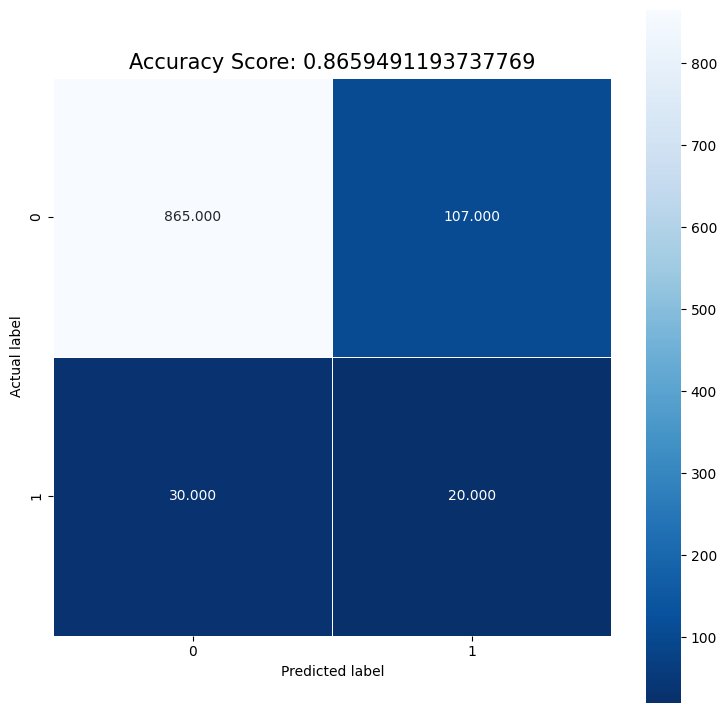

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc_te)
plt.title(all_sample_title, size = 15);

###Comparison with sklearn LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression(multi_class='ovr', class_weight='balanced')
logisticRegr.fit(X_train, y_train)

# Use score method to get mean accuracy of model
score = logisticRegr.score(X_test, y_test)
print(score)

0.7348336594911937


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics


predictions = logisticRegr.predict(X_test)
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[714 258]
 [ 13  37]]


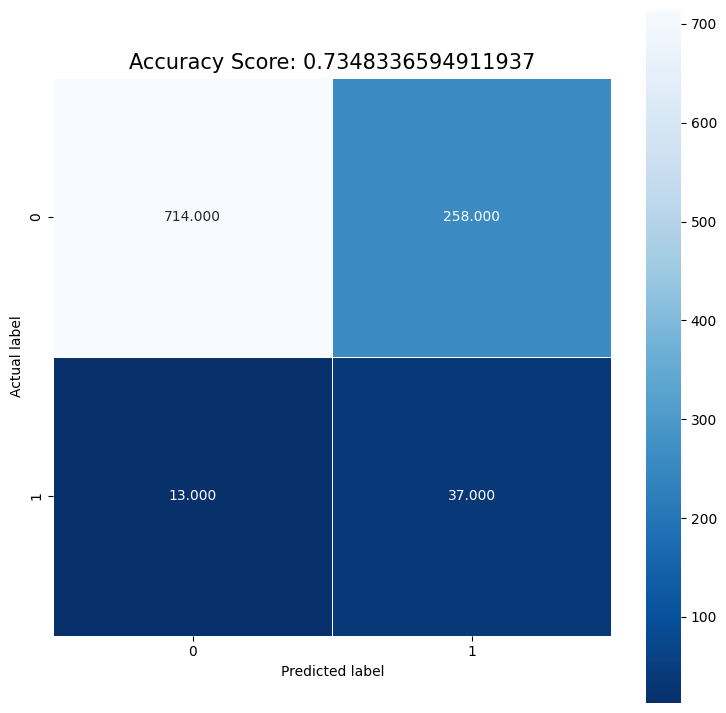

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [ ]:
'''
10 pts
Use a metric of either accuracy_score or balanced_accuracy_score to evaluate your predicted values and y_test
Explain why you prefer this metric over the other.
'''

**Accuracy (classification) Score.**

As per definition from sklearn:

In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.



In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)
#accuracy_score(y_true, y_pred, normalize=False)

0.8659491193737769

**Balanced Accuracy Score:**

As per definition from sklearn:

The balanced accuracy in binary and multiclass classification problems to deal with imbalanced datasets. It is defined as the average of recall obtained on each class.

The best value is 1 and the worst value is 0 when adjusted=False.



In [ ]:
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score(y_test, y_pred)


0.6449588477366255

Accuracy score treats all classes equally and problematic with imbalanced datasets with very few values in one specific class.

In our case, balanced accuracy score makes more sense as dataset is imbalanced. It's really helpful to understand, that model performs well not only on majority class but across all classes.

